<a href="https://colab.research.google.com/github/ArjunSasidaran/EmailSpamDetection/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

In [ ]:
nltk.download_shell()

In [ ]:
from google.colab import files

In [ ]:
upload = files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [ ]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [ ]:
print(len(messages))

5574


In [ ]:
for mess_no, message in enumerate(messages[:10]):
  print(mess_no, message)
  print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

In [ ]:
import pandas as pd


In [ ]:
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label','message'])

In [ ]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
messages['length'] = messages['message'].apply(len)

In [ ]:
messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

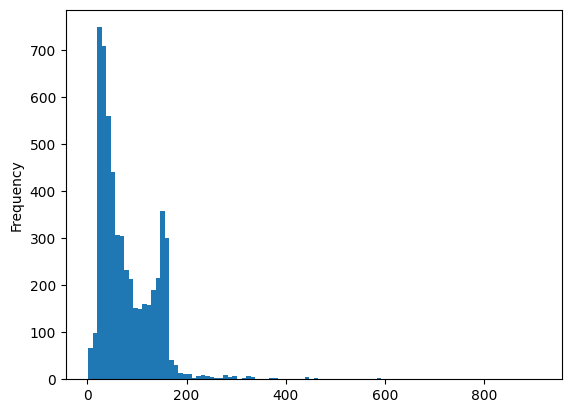

In [ ]:
messages['length'].plot.hist(bins = 100)

In [ ]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
messages[messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

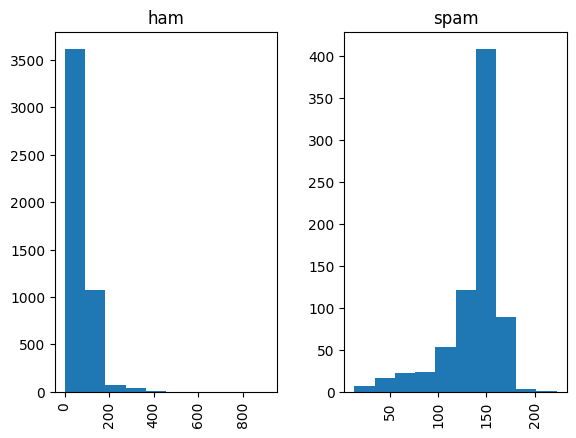

In [ ]:
messages.hist(column = 'length', by = 'label')

In [ ]:
import string

In [ ]:
mess = 'Sample message! Notice: it has punctutiation.'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nopunc = []
for x in mess:
  if x not in string.punctuation:
    nopunc.append(x)

nopunc

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

In [ ]:
nopunc = ''.join(nopunc)

In [ ]:
nopunc

'Sample message Notice it has punctutiation'

In [ ]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctutiation']

In [ ]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
clean_mess

['Sample', 'message', 'Notice', 'punctutiation']

In [ ]:
def text_process(mess):
  """
  1. remove punctuation
  2. remove stopwords
  3. return clean list of words
  """

  nopunc = []
  for x in mess:
    if x not in string.punctuation:
      nopunc.append(x)

  nopunc = ''.join(nopunc)
  nopunc = nopunc.split()

  cleaned = []
  for word in nopunc:
    if word.lower() not in stopwords.words('english'):
      cleaned.append(word)

  return cleaned



In [ ]:
result = text_process(mess)
print(result)

['Sample', 'message', 'Notice', 'punctutiation']


In [ ]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transform = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [ ]:
print(len(bow_transform.vocabulary_))

11425


In [ ]:
mess4 = messages['message'][3]

In [ ]:
print(mess4)

U dun say so early hor... U c already then say...


In [ ]:
bow4 = bow_transform.transform([mess4])

In [ ]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [ ]:
print(bow4.shape)

(1, 11425)


In [ ]:
bow_transform.get_feature_names_out()[4068]

'U'

In [ ]:
messages_bow = bow_transform.transform(messages['message'])

In [ ]:
messages_bow.shape

(5572, 11425)

In [ ]:
messages_bow.nnz

50548

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [ ]:
tfidf4 = tfidf_transformer.transform(bow4)

In [ ]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [ ]:
tfidf_transformer.idf_[bow_transform.vocabulary_['university']]

8.527076498901426

In [ ]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [ ]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [ ]:
messages['label'][3]

'ham'

In [ ]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [ ]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [ ]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ff0ec281ab0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1449
        spam       1.00      0.70      0.82       223

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

